In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import glob
import os
# from alive_progress import alive_it
from tqdm import tqdm

In [3]:
!pwd

/Users/I748920/Desktop/secure-face-capture-python-app/dev/data


In [4]:
DATA_PATH = "/Users/I748920/Desktop/secure-face-capture-python-app/datasets/mrlEyes_2018_01"

In [5]:
imgs = glob.glob(DATA_PATH+"/**/*.png")
len(imgs),imgs[0]

(84898,
 '/Users/I748920/Desktop/secure-face-capture-python-app/datasets/mrlEyes_2018_01/s0030/s0030_00663_0_0_1_0_1_01.png')

In [6]:
with open("/Users/I748920/Desktop/secure-face-capture-python-app/datasets/mrlEyes_2018_01/annotation.txt", 'r') as file:
    content = file.read()
print(content)

subject ID:
xxx

image number:
xxx

gender:
0 - male
1 - famale

glasses:
0 - no
1 - yes

eye state:
0 - close
1 - open

reflections:
0 - none
1 - low
2 - high

lighting conditions/image quality:
0 - bad
1 - good

sensor type:
01 - RealSense SR300 640x480
02 - IDS Imaging, 1280x1024
03 - Aptina Imagin 752x480

example:
s001_00123_0_0_0_0_0_01.png







In [44]:
info = {
    "image_path":[],
    "subject_ID":[],
    "image_number":[],
    "gender":[],
    "glasses":[],
    "eye_state":[],
    "reflections":[],
    "image_quality":[],
    "sensor_type":[],
}

for img in tqdm(imgs):
    info["image_path"].append(img)
    info["subject_ID"].append(img.split("/")[-1].split(".")[0].split("_")[0])
    info["image_number"].append(img.split("/")[-1].split(".")[0].split("_")[1])
    info["gender"].append(img.split("/")[-1].split(".")[0].split("_")[2])
    info["glasses"].append(img.split("/")[-1].split(".")[0].split("_")[3])
    info["eye_state"].append(img.split("/")[-1].split(".")[0].split("_")[4])
    info["reflections"].append(img.split("/")[-1].split(".")[0].split("_")[5])
    info["image_quality"].append(img.split("/")[-1].split(".")[0].split("_")[6])
    info["sensor_type"].append(img.split("/")[-1].split(".")[0].split("_")[7])

100%|██████████| 84898/84898 [00:00<00:00, 263481.81it/s]


In [48]:
df = pd.DataFrame.from_dict(info)
df

,image_path,subject_ID,image_number,gender,glasses,eye_state,reflections,image_quality,sensor_type
0,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00663,0,0,1,0,1,01
1,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00486,0,0,1,0,1,01
2,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00384,0,0,1,0,1,01
3,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00782,0,0,1,0,1,01
4,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00764,0,0,1,0,1,01
...,...,...,...,...,...,...,...,...,...
84893,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,00534,1,0,0,1,1,01
84894,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,01793,1,0,1,0,1,01
84895,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,00331,1,0,0,0,1,01
84896,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,00709,1,0,0,0,1,01


In [50]:
df["label"] = df["eye_state"].apply(lambda x: "close" if x==0 else "open")
df

,image_path,subject_ID,image_number,gender,glasses,eye_state,reflections,image_quality,sensor_type,label
0,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00663,0,0,1,0,1,01,open
1,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00486,0,0,1,0,1,01,open
2,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00384,0,0,1,0,1,01,open
3,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00782,0,0,1,0,1,01,open
4,/Users/I748920/Desktop/secure-face-capture-pyt...,s0030,00764,0,0,1,0,1,01,open
...,...,...,...,...,...,...,...,...,...,...
84893,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,00534,1,0,0,1,1,01,open
84894,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,01793,1,0,1,0,1,01,open
84895,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,00331,1,0,0,0,1,01,open
84896,/Users/I748920/Desktop/secure-face-capture-pyt...,s0016,00709,1,0,0,0,1,01,open


In [143]:
df.to_csv("v1.0.0.csv",index=False)

plot some images

In [96]:
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [125]:
row

image_path       /Users/I748920/Desktop/secure-face-capture-pyt...
subject_ID                                                   s0036
image_number                                                 01704
gender                                                           1
glasses                                                          1
eye_state                                                        0
reflections                                                      0
image_quality                                                    0
sensor_type                                                     01
label                                                         open
Name: 18816, dtype: object

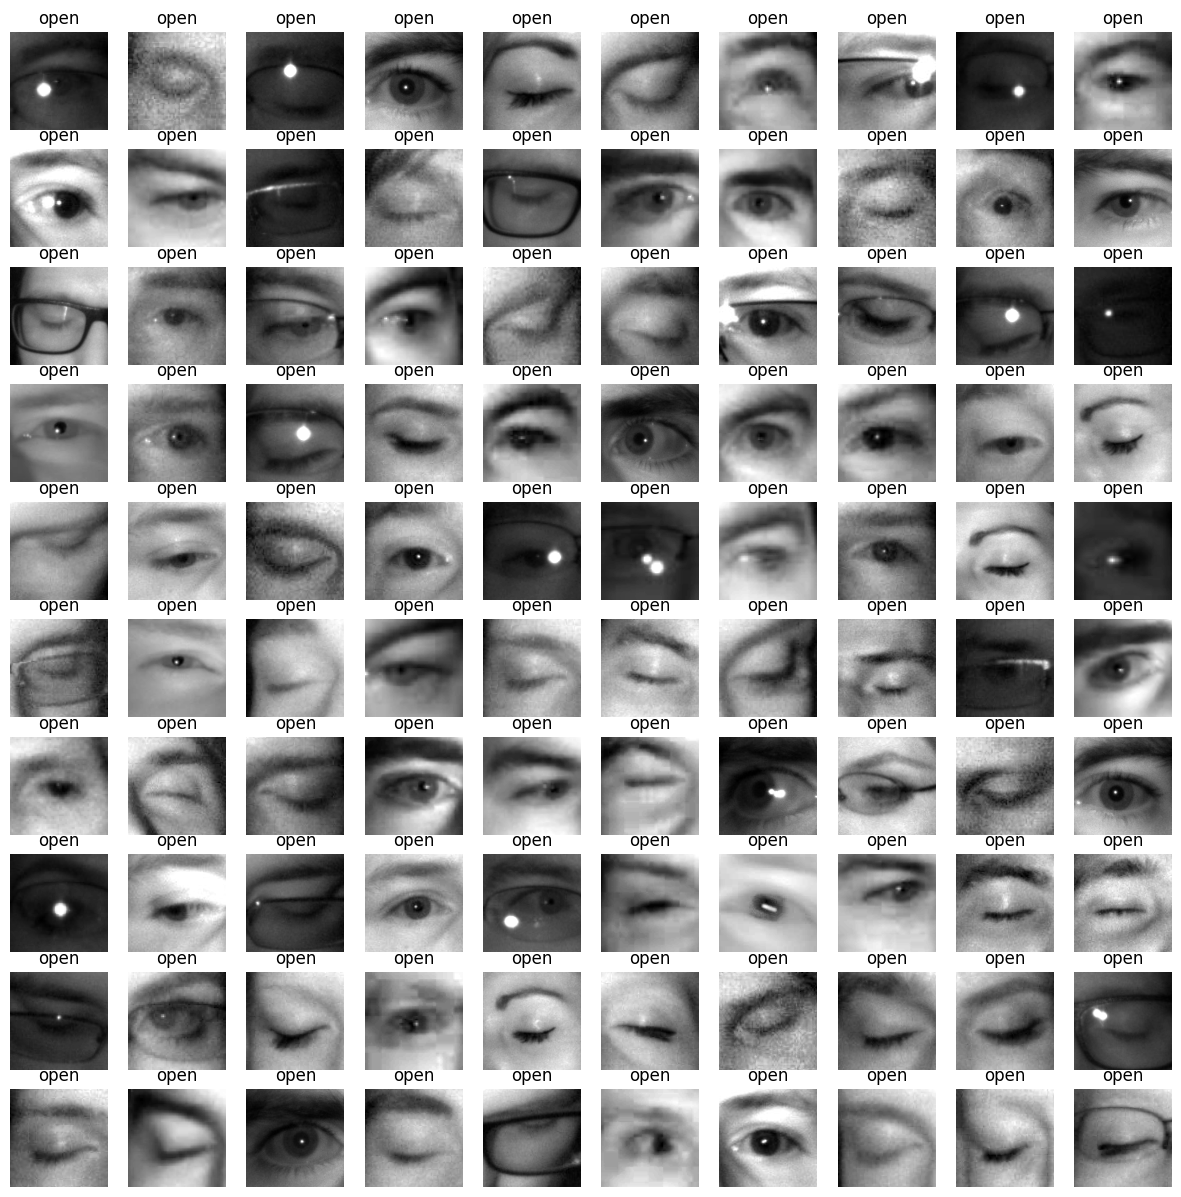

In [139]:
fig,ax=plt.subplots(10,10,figsize=(15,15))

ind = 1
for i,row in df.sample(n=100,random_state=1).iterrows():
    image_path = row["image_path"]
    label = row["label"]

    img = load_image(image_path)
    plt.subplot(10,10,ind)
    plt.imshow(img,cmap='gray')
    plt.title(label)
    plt.axis("off")
    ind+=1

plt.show()